## VISUALIZATION THE HAPPY RESULTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

### Variables Declaration

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

happy_outdir = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003"
query_vcf = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/2.Parabricks/HG003/MGISEQ2000_PCR-free_NA24149_V100002807_L01/variants/deepvariant/MGISEQ2000_PCR-free_NA24149_V100002807_L01_pbrun_fq2bam_GPU.bam.deepvariant.vcf"

##Searching prefix
happy_files = [f for f in os.listdir(happy_outdir) if f.endswith('.summary.csv')]
if not happy_files:
    logging.error("No .summary.csv files found in the directory.")
else:
    prefix = happy_files[0].split('.summary.csv')[0]
    logging.info(f"Prefix extracted: {prefix}")
    
roc_indel_file = os.path.join(happy_outdir, f"{prefix}.roc.Locations.INDEL.PASS.csv")
roc_snp_file = os.path.join(happy_outdir, f"{prefix}.roc.Locations.SNP.PASS.csv")
summary_file = os.path.join(happy_outdir, f"{prefix}.summary.csv")
if not os.path.exists(roc_indel_file):
    logging.error(f"File not found: {roc_indel_file}")
if not os.path.exists(roc_snp_file):
    logging.error(f"File not found: {roc_snp_file}")
if not os.path.exists(summary_file):
    logging.error(f"File not found: {summary_file}")

##Logging the files found
logging.info(f"Happy output directory: {happy_outdir}")
logging.info(f"Prefix used for searching files: {prefix}")

logging.info(f"SEARCHING FOR THE ESSENTIAL FILEs:")
logging.info(f"ROC INDEL file: {roc_indel_file}")
logging.info(f"ROC SNP file: {roc_snp_file}")
logging.info(f"Summary file: {summary_file}")


2025-08-05 11:06:48,187 - INFO - Prefix extracted: HG003_Comparison
2025-08-05 11:06:48,189 - INFO - Happy output directory: /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003
2025-08-05 11:06:48,189 - INFO - Prefix used for searching files: HG003_Comparison
2025-08-05 11:06:48,189 - INFO - SEARCHING FOR THE ESSENTIAL FILEs:
2025-08-05 11:06:48,190 - INFO - ROC INDEL file: /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003/HG003_Comparison.roc.Locations.INDEL.PASS.csv
2025-08-05 11:06:48,191 - INFO - ROC SNP file: /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003/HG003_Comparison.roc.Locations.SNP.PASS.csv
2025-08-05 11:06:48,192 - INFO - Summary file: /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003/HG003_Comparison.summary.csv


### Visualized the QUAL for query vcf

2025-08-05 11:06:51,019 - INFO - Query VCF file loaded with 10986 records.


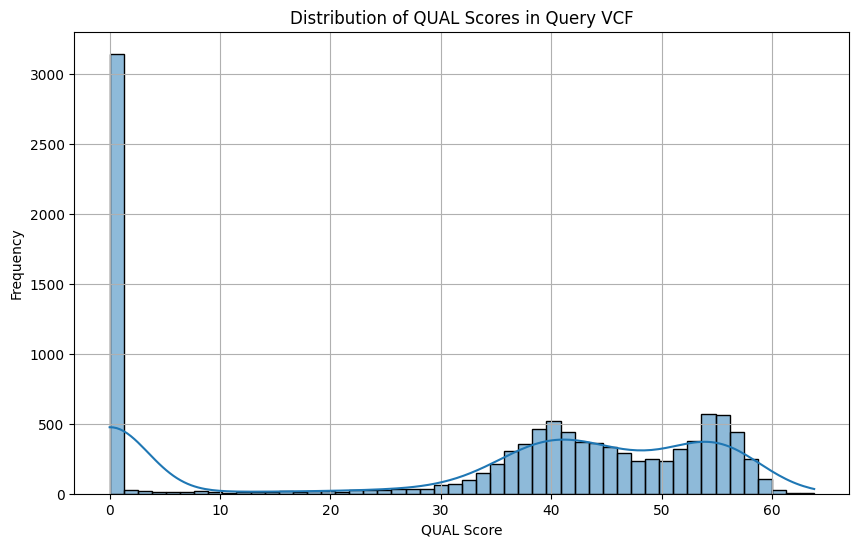

In [5]:
##Searching for the query_vcf file
if not os.path.exists(query_vcf):
    logging.error(f"Query VCF file not found: {query_vcf}")
else:
    ##Reads the vcf file with comment and specified header
    query = pd.read_csv(query_vcf, comment='#', header=None, sep='\t', 
                       names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    
    logging.info(f"Query VCF file loaded with {query.shape[0]} records.")

##Render histogram for QUAL
plt.figure(figsize=(10, 6))
sns.histplot(query['QUAL'], bins=50, kde=True)
plt.title('Distribution of QUAL Scores in Query VCF')
plt.xlabel('QUAL Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(happy_outdir, f"{prefix}_qual_distribution.png"))

### Render plot for Summary file

In [6]:
##Reads the summary file
try:
    summary_df = pd.read_csv(summary_file, sep=',')
    logging.info(f"Summary file read successfully with {summary_df.shape[0]} rows and {summary_df.shape[1]} columns.")
except Exception as e:
    logging.error(f"Error reading summary file: {e}")

2025-08-05 11:06:55,049 - INFO - Summary file read successfully with 4 rows and 18 columns.


In [7]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Hap.py Variant Calling Performance Summary', fontsize=20, fontweight='bold')

# 1. Total variant counts (Truth vs Query) - FIRST
if 'TRUTH.TOTAL' in summary_df.columns:
    total_data = summary_df[summary_df['Type'].isin(['SNP', 'INDEL'])][['Type', 'TRUTH.TOTAL', 'QUERY.TOTAL']]
    total_melted = pd.melt(total_data, id_vars=['Type'], var_name='Dataset', value_name='Total_Variants')
    
    sns.barplot(data=total_melted, x='Type', y='Total_Variants', hue='Dataset', ax=axes[0,0])
    axes[0,0].set_title('Total Variants: Truth vs Query', fontsize=16, fontweight='bold')
    axes[0,0].set_xlabel('Type', fontsize=14)
    axes[0,0].set_ylabel('Total Variants', fontsize=14)
    axes[0,0].tick_params(axis='both', which='major', labelsize=12)
    axes[0,0].legend(title='Dataset', title_fontsize=12, fontsize=11)
    ## Add value labels on top of bars
    for container in axes[0,0].containers:
        axes[0,0].bar_label(container, fmt='%d', padding=3, fontsize=11)

# 2. True Positives, False Positives, False Negatives - SECOND
if 'TRUTH.TP' in summary_df.columns:
    tp_fp_fn_data = summary_df[summary_df['Type'].isin(['SNP', 'INDEL'])][['Type', 'TRUTH.TP', 'QUERY.FP', 'TRUTH.FN']]
    tp_fp_fn_melted = pd.melt(tp_fp_fn_data, id_vars=['Type'], var_name='Category', value_name='Count')
    
    sns.barplot(data=tp_fp_fn_melted, x='Type', y='Count', hue='Category', ax=axes[0,1])
    axes[0,1].set_title('True Positives, False Positives & False Negatives', fontsize=16, fontweight='bold')
    axes[0,1].set_xlabel('Type', fontsize=14)
    axes[0,1].set_ylabel('Count', fontsize=14)
    axes[0,1].tick_params(axis='both', which='major', labelsize=12)
    axes[0,1].legend(title='Categories', title_fontsize=12, fontsize=11)
    
    # Add value labels on top of bars
    for container in axes[0,1].containers:
        axes[0,1].bar_label(container, fmt='%d', padding=3, fontsize=11)

# 3. Precision, Recall, and F1-score comparison by variant type - THIRD
if 'Type' in summary_df.columns and 'METRIC.Precision' in summary_df.columns:
    metrics_data = summary_df[summary_df['Type'].isin(['SNP', 'INDEL'])][['Type', 'METRIC.Precision', 'METRIC.Recall', 'METRIC.F1_Score']]
    metrics_melted = pd.melt(metrics_data, id_vars=['Type'], var_name='Metric', value_name='Score')
    
    sns.barplot(data=metrics_melted, x='Type', y='Score', hue='Metric', ax=axes[1,0])
    axes[1,0].set_title('Precision, Recall & F1-Score by Variant Type', fontsize=16, fontweight='bold')
    axes[1,0].set_xlabel('Type', fontsize=14)
    axes[1,0].set_ylabel('Score', fontsize=14)
    axes[1,0].set_ylim(0, 1)
    axes[1,0].tick_params(axis='both', which='major', labelsize=12)
    axes[1,0].legend(title='Metrics', title_fontsize=12, fontsize=11)
    ##Add value labels on top of bars
    for container in axes[1,0].containers:
        axes[1,0].bar_label(container, fmt='%.2f', padding=3, fontsize=11)
        
# 4. Performance metrics heatmap - FOURTH
if len(summary_df) > 1:
    metric_cols = [col for col in summary_df.columns if 'METRIC.' in col]
    if metric_cols and 'Type' in summary_df.columns:
        # Filter for specific conditions to avoid duplicates
        filtered_df = summary_df[
            (summary_df['Type'].isin(['SNP', 'INDEL'])) & 
            (summary_df['Filter'] == 'PASS')  # Assuming there's a Filter column
        ]
        
        # If no Filter column exists or all rows are needed, use drop_duplicates
        if filtered_df.empty:
            filtered_df = summary_df[summary_df['Type'].isin(['SNP', 'INDEL'])].drop_duplicates(subset=['Type'])
        
        heatmap_data = filtered_df.set_index('Type')[metric_cols]
        sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlBu_r', ax=axes[1,1], 
                   annot_kws={'fontsize': 12}, cbar_kws={'label': 'Metric Value'})
        axes[1,1].set_title('Performance Metrics Heatmap', fontsize=16, fontweight='bold')
        axes[1,1].set_xlabel('Metrics', fontsize=14)
        axes[1,1].set_ylabel('Type', fontsize=14)
        axes[1,1].tick_params(axis='both', which='major', labelsize=12)
        # Adjust colorbar label font size
        cbar = axes[1,1].collections[0].colorbar
        cbar.ax.tick_params(labelsize=11)
        cbar.set_label('Metric Value', fontsize=12)

plt.tight_layout()

##Save the plot
plt.savefig(os.path.join(happy_outdir, f"{prefix}_performance_summary.png"), dpi=300, bbox_inches='tight')
logging.info(f"Performance summary plot saved as {prefix}_performance_summary.png")
plt.close(fig)

2025-08-05 11:06:59,041 - INFO - Performance summary plot saved as HG003_Comparison_performance_summary.png


### Render the ROC for roc_snp_file and roc_indel_file

In [8]:
def plot_precision_recall_with_qq(df, type, ylim=(0.98, 1), figsize=(10, 6)):
    """
    Plot Precision-Recall curves with QQ values visualization
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing METRIC.Precision, METRIC.Recall, and QQ columns
    ylim : tuple, default (0.98, 1)
        Y-axis limits for the plots
    figsize : tuple, default (10, 6)
        Figure size (width, height)

    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    ##Sort the DataFrame by QQ values
    if 'QQ' in df.columns:
        df = df.sort_values(by='QQ', ascending=False).reset_index(drop=True)
        logging.info("DataFrame sorted by QQ values.")

    # Create figure and subplot
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.suptitle('Precision-Recall Analysis for {} Variants'.format(type), fontsize=16, fontweight='bold')

    # Check required columns
    required_cols = ['METRIC.Precision', 'METRIC.Recall', 'QQ']
    missing_cols = [col for col in required_cols if col not in df.columns]

    if missing_cols:
        print(f"Warning: Missing columns {missing_cols}. Cannot create plots.")
        return fig, ax

    # Line plot with QQ values on top x-axis
    ax.plot(df['METRIC.Recall'], df['METRIC.Precision'], 
            'b-', linewidth=2, alpha=0.7)

    ax.set_xlabel('Recall (Sensitivity)')
    ax.set_ylabel('Precision')
    ax.set_title('Precision-Recall Curve\n(with QQ values on top axis)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(ylim)

    # Create secondary x-axis on top for QQ values
    ax2 = ax.twiny()

    # Select key points for QQ axis labels (every 10th point or fewer)
    step = max(1, len(df) // 8)  # Show ~8 QQ values
    qq_indices = range(0, len(df), step)
    qq_recall_positions = df.iloc[qq_indices]['METRIC.Recall'].values
    qq_values = df.iloc[qq_indices]['QQ'].values

    # Set the QQ axis ticks and labels
    ax2.set_xlim(0, 1)
    ax2.set_xticks(qq_recall_positions)
    ax2.set_xticklabels([f'{qq:.1f}' for qq in qq_values])
    ax2.set_xlabel('QQ Value (Quality Threshold)', color='red')
    ax2.tick_params(axis='x', colors='red')

    plt.tight_layout()
    #Save the plot
    plt.savefig(os.path.join(happy_outdir, f"{prefix}_precision_recall_{type}.png"))
    logging.info(f"Precision-Recall plot saved as {prefix}_precision_recall_{type}.png")
    plt.close(fig)

In [9]:
#Plot the line plot show the correlation between METRIC.F1_Score and QQ
def plot_F1Score_with_qq(df, type, ylim=(0.98, 1), figsize=(10, 6)):
    """
    Plot the correlation between METRIC.F1_Score and QQ values.

    Args:
        df (_type_): _description_
        type (_type_): _description_
        ylim (tuple, optional): _description_. Defaults to (0.98, 1).
        figsize (tuple, optional): _description_. Defaults to (10, 6).
    """
    ##Render the line plot showing the correlation between METRIC.F1_Score and QQ
    if 'QQ' not in df.columns or 'METRIC.F1_Score' not in df.columns:
        logging.error("Required columns 'QQ' or 'METRIC.F1_Score' are missing in the DataFrame.")
        return None, None
    df = df.sort_values(by='QQ', ascending=False).reset_index(drop=True)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.suptitle('F1 Score vs QQ Values for {} Variants'.format(type), fontsize=16, fontweight='bold')
    ax.plot(df['QQ'], df['METRIC.F1_Score'], 
            'b-', linewidth=2, alpha=0.7)
    ax.set_xlabel('QQ Value (Quality Threshold)')
    ax.set_ylabel('F1 Score')
    ax.set_title('F1 Score vs QQ Values\n(with QQ values on x-axis)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 60)
    ax.set_ylim(ylim)
    plt.tight_layout()
    #Save the plot
    plt.savefig(os.path.join(happy_outdir, f"{prefix}_f1score_qq_{type}.png"))
    logging.info(f"F1 Score vs QQ plot saved as {prefix}_f1score_qq_{type}.png")
    plt.close(fig)

In [10]:
## Check the file existence
if os.path.exists(roc_snp_file):
    logging.info(f"ROC SNP file found: {roc_snp_file}")
    #Read
    roc_snp_df = pd.read_csv(roc_snp_file, sep=',')
    logging.info(f"ROC SNP file read successfully with {roc_snp_df.shape[0]} rows and {roc_snp_df.shape[1]} columns.")
    
    ## Render the ROC for roc_snp_file
    plot_precision_recall_with_qq(roc_snp_df, "SNP", ylim=(0.95, 1.0))
    
    #Plot the F1 Score with QQ
    plot_F1Score_with_qq(roc_snp_df, "SNP", ylim=(0, 1.0))
    
else:
    logging.error(f"ROC SNP file not found: {roc_snp_file}")

# Render the ROC for roc_indel_file
if os.path.exists(roc_indel_file):
    logging.info(f"ROC INDEL file found: {roc_indel_file}")
    # Read
    roc_indel_df = pd.read_csv(roc_indel_file, sep=',')
    logging.info(f"ROC INDEL file read successfully with {roc_indel_df.shape[0]} rows and {roc_indel_df.shape[1]} columns.")

    ## Render the ROC for roc_indel_file
    plot_precision_recall_with_qq(roc_indel_df, "INDEL", ylim=(0.5, 1.0))
    
    ## Plot the F1 Score with QQ
    plot_F1Score_with_qq(roc_indel_df, "INDEL", ylim=(0, 1.0))
else:
    logging.error(f"ROC INDEL file not found: {roc_indel_file}")

2025-08-05 11:07:04,638 - INFO - ROC SNP file found: /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003/HG003_Comparison.roc.Locations.SNP.PASS.csv
2025-08-05 11:07:04,643 - INFO - ROC SNP file read successfully with 98 rows and 65 columns.
2025-08-05 11:07:04,644 - INFO - DataFrame sorted by QQ values.
2025-08-05 11:07:04,901 - INFO - Precision-Recall plot saved as HG003_Comparison_precision_recall_SNP.png
2025-08-05 11:07:05,129 - INFO - F1 Score vs QQ plot saved as HG003_Comparison_f1score_qq_SNP.png
2025-08-05 11:07:05,130 - INFO - ROC INDEL file found: /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/SERVICE2025/G4500_DRAGEN_PARABRICKS/src/hap_py/HG003/HG003_Comparison.roc.Locations.INDEL.PASS.csv
2025-08-05 11:07:05,153 - INFO - ROC INDEL file read successfully with 67 rows and 65 columns.
2025-08-05 11:07:05,153 - INFO - DataFrame sorted by QQ values.
2025-08-05 11:07:05,406 - INFO - Precision-Recall plot saved as HG003_Comparison_precision_rec